In [64]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Fetching data

In [65]:
data = pd.read_csv('../../datasets/FER2013/fer2013.csv')

In [66]:
def show_image(im_nb):
    pixels = data['pixels'].iloc[im_nb]
    label = data['emotion'].iloc[im_nb] 
    image_array = np.fromstring(pixels, dtype=np.uint8, sep=' ').reshape(48, 48)
    
    cv2.imshow('Image', image_array)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print(label)

In [67]:
# show_image(2)

| Index | Émotion   |
|-------|-----------|
| 0     | Angry     |
| 1     | Disgust   |
| 2     | Fear      |
| 3     | Happy     |
| 4     | Sad       |
| 5     | Surprise  |
| 6     | Neutral   |


In [68]:
def preprocess_images(data):
    images = []
    labels = data['emotion'].values

    for pixel_sequence in data['pixels']:
        single_image = np.fromstring(pixel_sequence, dtype=int, sep=' ')
        single_image = single_image.reshape(48, 48) 
        images.append(single_image)

    images = np.array(images, dtype='float32')
    images = np.expand_dims(images, -1)  # Additional dimension for channels
    images /= 255.0  # Standardization (value between 0 and 1)

    return images, labels

In [69]:
images, labels = preprocess_images(data)
print(f"\nNumber of images in dataset: {len(images)}")


Number of images in dataset: 35887


## Class distributions

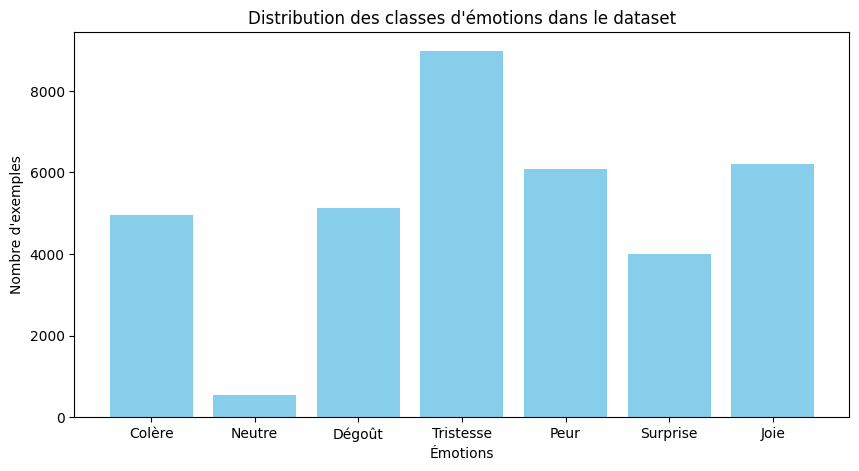

In [70]:
label_counts = Counter(labels)

emotions, counts = zip(*label_counts.items())

plt.figure(figsize=(10, 5))
plt.bar(emotions, counts, color='skyblue')
plt.xlabel('Émotions')
plt.ylabel('Nombre d\'exemples')
plt.title('Distribution des classes d\'émotions dans le dataset')
plt.xticks(emotions, ['Colère', 'Dégoût', 'Peur', 'Joie', 'Tristesse', 'Surprise', 'Neutre'])
plt.show()

### Undersampling

In [71]:
def undersample_data(images, labels):
    labels = np.array(labels)
    
    min_class_size = np.min([sum(labels == i) for i in np.unique(labels)]) # Minority class
    
    undersampled_images = []
    undersampled_labels = []
    
    for label in np.unique(labels):
    
        class_images = images[labels == label]
        class_labels = labels[labels == label]
        
        class_images_undersampled, class_labels_undersampled = resample(class_images, class_labels, 
                                                                        replace=False, 
                                                                        n_samples=min_class_size, 
                                                                        random_state=42)
        
        undersampled_images.extend(class_images_undersampled)
        undersampled_labels.extend(class_labels_undersampled)
    
    return np.array(undersampled_images), np.array(undersampled_labels)

In [72]:
images_resample, labels_resample = undersample_data(images, labels)
print(f"\nNumber of images in dataset after undersampling: {len(images_resample)}")


Number of images in dataset after undersampling: 3829


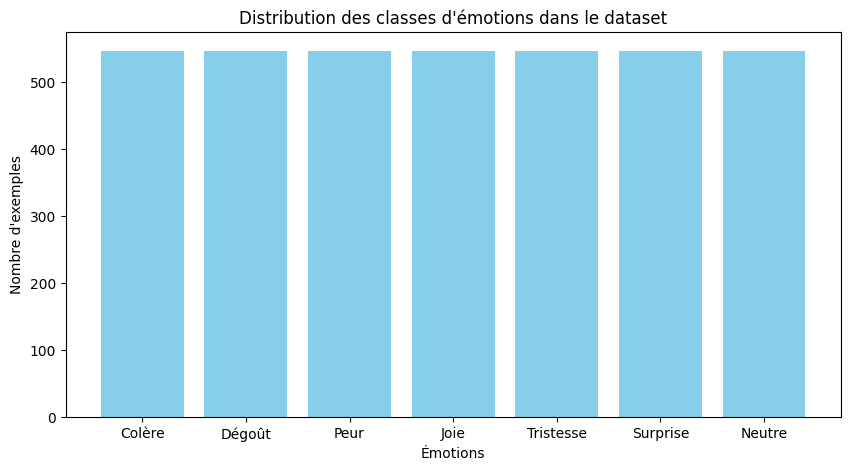

In [73]:
label_counts = Counter(labels_resample)

emotions, counts = zip(*label_counts.items())

plt.figure(figsize=(10, 5))
plt.bar(emotions, counts, color='skyblue')
plt.xlabel('Émotions')
plt.ylabel('Nombre d\'exemples')
plt.title('Distribution des classes d\'émotions dans le dataset')
plt.xticks(emotions, ['Colère', 'Dégoût', 'Peur', 'Joie', 'Tristesse', 'Surprise', 'Neutre'])
plt.show()

In [74]:
print(f"\nReducing dataset size after undersampling : {len(images)/len(images_resample)*100:.2f}%")


Reducing dataset size after undersampling : 937.24%


### SMOTE

Splitting the dataset before applying SMOTE to avoid compromising the integrity of the test set.

In [75]:
images1D = images.reshape(images.shape[0], -1) 
X_train, X_test, y_train, y_test = train_test_split(images1D, labels, test_size=0.25, random_state=42)

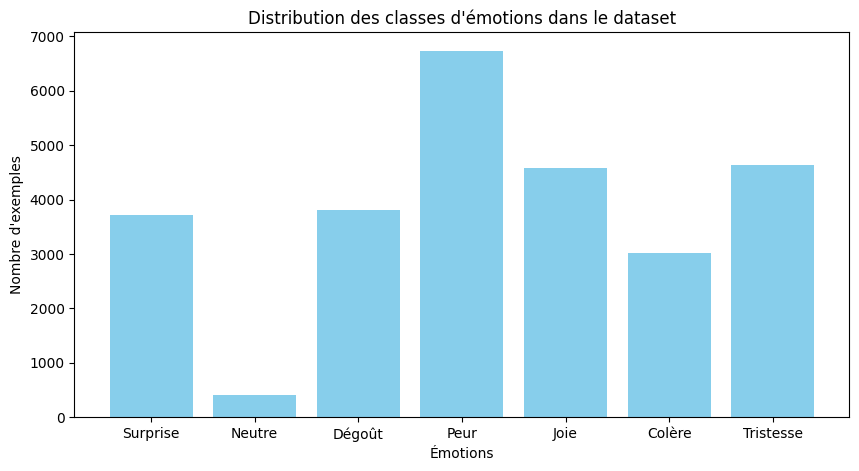

In [76]:
label_counts = Counter(y_train)

emotions, counts = zip(*label_counts.items())

plt.figure(figsize=(10, 5))
plt.bar(emotions, counts, color='skyblue')
plt.xlabel('Émotions')
plt.ylabel('Nombre d\'exemples')
plt.title('Distribution des classes d\'émotions dans le dataset')
plt.xticks(emotions, ['Colère', 'Dégoût', 'Peur', 'Joie', 'Tristesse', 'Surprise', 'Neutre'])
plt.show()

In [77]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

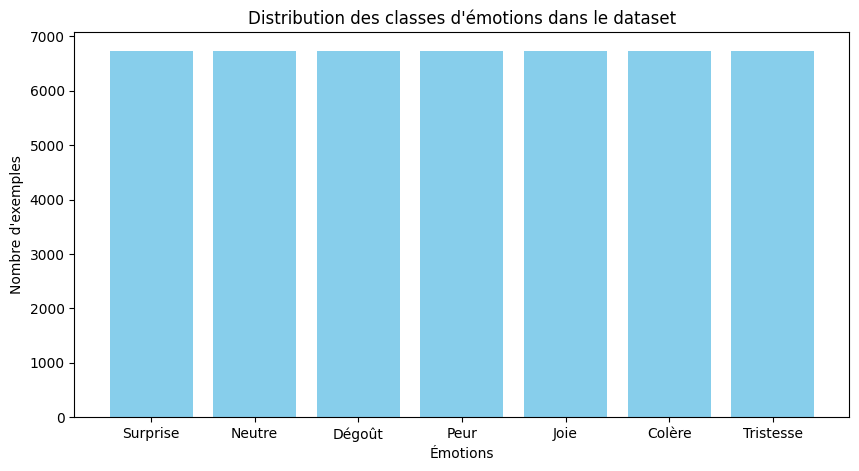

In [78]:
label_counts = Counter(y_train_sm)

emotions, counts = zip(*label_counts.items())

plt.figure(figsize=(10, 5))
plt.bar(emotions, counts, color='skyblue')
plt.xlabel('Émotions')
plt.ylabel('Nombre d\'exemples')
plt.title('Distribution des classes d\'émotions dans le dataset')
plt.xticks(emotions, ['Colère', 'Dégoût', 'Peur', 'Joie', 'Tristesse', 'Surprise', 'Neutre'])
plt.show()